In [40]:
import pandas
import re

from time import time

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

url = 'data-pre-processing.csv'
dataframe = pandas.read_csv(url)

tokenizer = RegexpTokenizer("[\w']+")
stemmer = PorterStemmer()
vectorizer = TfidfVectorizer(stop_words='english')

corpus = []
corpusOriginal = []
corpusClassification = []

# print("Removing contraction - replacer.replace")
# print("Removing special chars - re.sub") -> Pay attention to <br> </br> (ouseébrHEUehUE)
# print("Steeming words - steemer.stem")
for videoId,author,date,content,classification in dataframe.values:
    comment = []
    corpusOriginal.append(content)
    content = content.lower()
    content = re.sub('(\s|\<)br\s*.\>', '', content)
    content = re.sub('(href.*)?http(.*)(\.com)?', 'HTTPWEBSITE', content)
    content = re.sub('[^A-Za-z0-9\s]+', '', content)
    corpusClassification.append(classification)
    for word in tokenizer.tokenize(content):
            word = stemmer.stem(word)
            comment.append(word)
    corpus.append(" ".join(comment))

print("Creating bag of words - vectorizer.fit_transform")
print()

vectorized =  vectorizer.fit_transform(corpus)

Creating bag of words - vectorizer.fit_transform



Executing - K-means
Clusters: 2 - 0.04553 - done in 4.440s
Clusters: 3 - 0.07958 - done in 5.479s
Clusters: 4 - 0.08725 - done in 6.511s
Clusters: 5 - 0.09322 - done in 9.412s
Clusters: 6 - 0.09813 - done in 11.607s
Clusters: 7 - 0.10056 - done in 12.143s
Clusters: 8 - 0.10300 - done in 12.940s
Clusters: 9 - 0.10506 - done in 11.297s


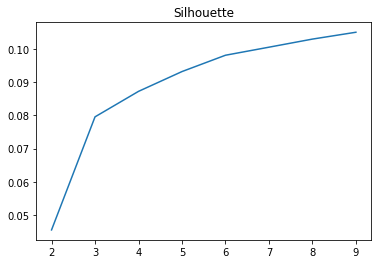

Best silhouette is 0.10506 - 8 clusters

Comments from each cluster:
Cluster 0:Huh, anyway check out this you[tube] channel: kobyoshi02
Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
watch?v=vtaRGgvGtWQ   Check this out .ï»¿
Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com
i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿
You should check my channel for Funny VIDEOS!!ï»¿
and u should.d check my channel and tell me what I should do next!ï»¿
Hello! Do you like gaming, art videos, scientific experiments, tutorials,  lyrics videos, and much, much more of that? If you do please check out our  channel and subscribe to it, we've just started, but soon we hope we will  be able to cover all of our expectations... You can also check out what  we've got so far!ï»¿
I'm only checking the viewsï»¿
just checking the vi

There is 7 bilion poeple on earth Now stop being dumbï»¿
I love this shit but I disliked it because it's sucksï»¿
this video is very inaccurate, a tiger would rip her face ofï»¿
Great video by a great artist in Katy Perry! Admire her creativity! Check  out our channel for no nonsense mobile tech reviews and comparisons as well  as an iPhone 6 and 6 Plus review and comparison!ï»¿
Are those real animalsï»¿
Boooobsï»¿
I really don't understand how this has 600 million views lol. I'm not  hating or anything, it's just confusing. ï»¿
Its almost Katys birthday! October 25th Lets say happy birthday to katy!!! â™¥â™¥â™¥â™¥â™¥â™¥ï»¿
Katy Perry You Are Looking Soo PRETTY DAMN CUTE :-* :-*ï»¿
looooooooooooooooooooovvvvvvvvveeeeeeeeeeee itttttttttttttï»¿
My telephone!ï»¿
Hey guys! I've made a amazing Smiley T-Shirt.Of all the things you wear,  your expression is the most important and remember all the statistics in  the world canâ€™t measure the warmth of a smile. If you're a big fan of  T-Shirts 

In [41]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics
import matplotlib.pyplot as plt

print("Executing - K-means")

silhouetteValues = []
bestFitLabels = []
true_k = 10

for k in range(2, true_k):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000, verbose=False)
    t0 = time()
    km.fit(vectorized.toarray())
    labels = km.labels_
    silhouette = metrics.silhouette_score(vectorized.toarray(), labels, metric='euclidean')
    silhouetteValues.append(silhouette)
    
    #Store the labels for the best silhouette
    if silhouette >= max(silhouetteValues):
        bestFitLabels = labels
    print("Clusters: %d - %0.5f - done in %0.3fs" % (k, silhouette, (time() - t0)))

plt.title('Silhouette')
plt.plot(list(range(2, true_k)), silhouetteValues)
plt.show()

print("Best silhouette is %0.5f - %d clusters" % (max(silhouetteValues), max(bestFitLabels)))

print()
print("Comments from each cluster:")
for i in range(min(bestFitLabels), max(bestFitLabels) + 1):
    print("Cluster %d:" % i, end='')
    for index, original in enumerate(corpusOriginal):
        if bestFitLabels[index] == i:
            print(original)
    print()

Executing - Single Link
Clusters: 2 - 0.04429 - done in 8.963s
Clusters: 3 - 0.07847 - done in 9.284s
Clusters: 4 - 0.07778 - done in 8.828s
Clusters: 5 - 0.08978 - done in 12.857s
Clusters: 6 - 0.08965 - done in 13.259s
Clusters: 7 - 0.09318 - done in 9.864s
Clusters: 8 - 0.09638 - done in 12.495s
Clusters: 9 - 0.09894 - done in 13.729s


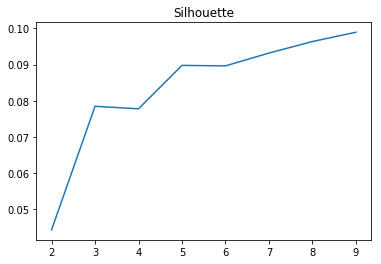

Best silhouette is 0.09894 - 8 clusters
Comments from each cluster:
Cluster 0:Huh, anyway check out this you[tube] channel: kobyoshi02
Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
just for test I have to say murdev.com
me shaking my sexy ass on my channel enjoy ^_^ ï»¿
watch?v=vtaRGgvGtWQ   Check this out .ï»¿
Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com
i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿
You should check my channel for Funny VIDEOS!!ï»¿
and u should.d check my channel and tell me what I should do next!ï»¿
Hey subscribe to meï»¿
 Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe right now.ï»¿
Hello! Do you like gaming, art videos, scientific experiments, tutorials,  ly

selfie alertï»¿
Your going to hear me Roar !!!! :-))))   #soundsofsunday ï»¿
It is a shitï»¿
She loves Vena. trojmiasto.pl/Vena-Bus-Taxi-o59253.htmlï»¿
THIS IS A COMPETITION TO MEET MY IDOLS, IT WOULD MEAN SO MUCH IF YOU GUYS  WILL LIKE THIS PIC ON IG! http://instagram.com/p/smZdivopxb/ï»¿
Katty perry please say in one of your new videoes that they follow the  Girls Girls pleaseï»¿
i am a big fan of you and i love youï»¿
I &lt	3 Katy Perry!ï»¿
Since she is a feminist champion, why would she want to reinforce the  stereotype of girls being girly by painting the nails of an elephant that  probably wouldn't even appreciate it?ï»¿
If interested in making extra money by internet use the next link www.swagbucks.com/refer/Nonturtle02ï»¿
This is fucking shit. From the first notes, that becomes clear. Complete  and utter shit. May God come and cleanse the earth of the complete and  utter idiocy which is humankind.ï»¿
Hey guys plz check out my youtube channel to c funny 2 girls 1 cup reaction  t

In [39]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt

print("Executing - Single Link")
silhouetteValues = []
bestFitLabels = []

n_clusters = 10

for k in range(2, n_clusters):
    t0 = time()
    ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    ward.fit(vectorized.toarray())
    labels = ward.labels_
    silhouette = metrics.silhouette_score(vectorized.toarray(), labels, metric='euclidean')
    silhouetteValues.append(silhouette)
    
    #Store the labels for the best silhouette
    if silhouette >= max(silhouetteValues):
        bestFitLabels = labels
    print("Clusters: %d - %0.5f - done in %0.3fs" % (k, silhouette, (time() - t0)))

plt.title('Silhouette')
plt.plot(list(range(2 , n_clusters)), silhouetteValues)
plt.show()

print("Best silhouette is %0.5f - %d clusters" % (max(silhouetteValues), max(bestFitLabels)))
      
print("Comments from each cluster:")
for i in range(min(bestFitLabels), max(bestFitLabels) + 1):
    print("Cluster %d:" % i, end='')
    for index, original in enumerate(corpusOriginal):
        if bestFitLabels[index] == i:
            print(original)
    print()

Executing - DBSCAN
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
10
Min Samples 10 - Clusters: 9 - -0.09292 - done in 11.414s
{0, 1, 2, 3, 4, -1}
6
Min Samples 20 - Clusters: 5 - 0.08546 - done in 11.685s
{0, 1, -1}
3
Min Samples 30 - Clusters: 2 - 0.07263 - done in 11.767s
{0, 1, -1}
3
Min Samples 40 - Clusters: 2 - 0.07263 - done in 16.733s
{0, 1, -1}
3
Min Samples 50 - Clusters: 2 - 0.07263 - done in 17.638s
{0, 1, -1}
3
Min Samples 60 - Clusters: 2 - 0.07263 - done in 15.657s
{0, 1, -1}
3
Min Samples 70 - Clusters: 2 - 0.07263 - done in 11.892s
{0, 1, -1}
3
Min Samples 80 - Clusters: 2 - 0.07263 - done in 16.060s
{0, -1}
2
Min Samples 90 - Clusters: 1 - 0.03830 - done in 17.095s
Best silhouette is 0.08546 - 4 clusters - 20 Min Samples


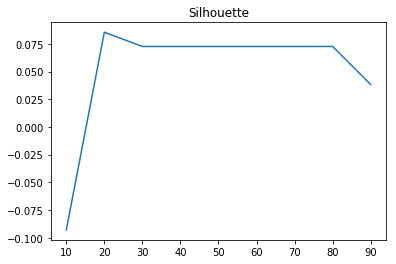

Comments from each cluster:
Cluster -1:Huh, anyway check out this you[tube] channel: kobyoshi02
Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
just for test I have to say murdev.com
me shaking my sexy ass on my channel enjoy ^_^ ï»¿
watch?v=vtaRGgvGtWQ   Check this out .ï»¿
Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com
Subscribe to my channel ï»¿
i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿
You should check my channel for Funny VIDEOS!!ï»¿
and u should.d check my channel and tell me what I should do next!ï»¿
Hey subscribe to meï»¿
 Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe right now.ï»¿
subscribe like commentï»¿
please like :D https://premium.easypromosapp.com/voteme/19924/

check out mah girl it duh shit yoï»¿
Check out this video on YouTube:Facebook lhudygirlamaya ï»¿
Hey yall its the real Kevin Hart, shout out to my fans!!! follow me +RealKevinHeart ï»¿
Check out my acoustic channel ï»¿
â™«I know someone will see this â™¥ I have a dreamâ€¦ I donâ€™t have the greatest videos or the best quality Right now I feel like i'm not getting anywhere and I need your help â™« If you could possibly watch my videos it means the world to me â™¥ Please thumbs this up so others can seeâ€¦ I appreciate it so much â™¥â™« Please listen before you hate. Honestly i  appreciate it so much  You donâ€™t have to love me just give this 17 year old a chanceï»¿
I hate videos like these with those poor animals.ï»¿
Hii youtubeï»¿
nice ..very niceï»¿
*KATY YOU ARE A SHIT GO DIE!!!!!ROAR IS A FLOOOOOOOOOOOOOOOOOOOOP*ï»¿
 I love your music ï»¿
My 6th grade teacher looked exactly like Katy Perry come to think of it...ï»¿
curti? click here ?  https://www.facebook.com/demiilovatofas?ref=hl

In [44]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

print("Executing - DBSCAN")

X = vectorized.toarray()
bestFitLabels = []
bestMinSamples = 0
silhouetteValues = []


for n_samples in range(10, 100, 10):
    t0 = time()
    db = DBSCAN(min_samples=n_samples).fit(X)
    labels = db.labels_
    print(set(labels))
    print(len(set(labels)))
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    silhouette = metrics.silhouette_score(vectorized.toarray(), labels)
    silhouetteValues.append(silhouette)
    
    if silhouette >= max(silhouetteValues):
        bestFitLabels = labels
        bestMinSamples = n_samples
    print("Min Samples %d - Clusters: %d - %0.5f - done in %0.3fs" % (n_samples, n_clusters_, silhouette, (time() - t0)))

print("Best silhouette is %0.5f - %d clusters - %d Min Samples" % (max(silhouetteValues), max(bestFitLabels), bestMinSamples))


plt.title('Silhouette')
plt.plot(list(range(10, 100, 10)), silhouetteValues)
plt.show()

print("Comments from each cluster:")
for i in range(min(bestFitLabels), max(bestFitLabels) + 1):
    print("Cluster %d:" % i, end='')
    for index, original in enumerate(corpusOriginal):
        if bestFitLabels[index] == i:
            print(original)
    print()

Executing - average Linkage
Clusters: 2 - 0.01277 - done in 9.209s
Clusters: 3 - 0.01277 - done in 9.753s
Clusters: 4 - 0.01277 - done in 9.422s
Clusters: 5 - 0.01277 - done in 12.292s
Clusters: 6 - 0.01277 - done in 13.541s
Clusters: 7 - 0.01277 - done in 13.994s
Clusters: 8 - 0.01277 - done in 15.888s
Clusters: 9 - 0.01277 - done in 15.948s


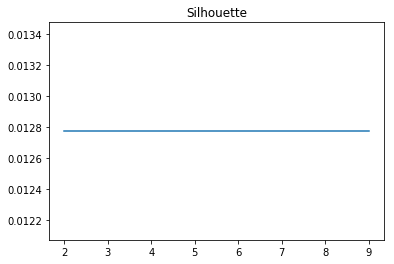

Best silhouette is 0.01277 - 8 clusters
Comments from each cluster:
Cluster 0:Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com
i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿
https://twitter.com/GBphotographyGBï»¿
I'm only checking the viewsï»¿
http://www.ebay.com/itm/171183229277?ssPageName=STRK:MESELX:IT&amp	_trksid=p3984.m1555.l2649 ï»¿
http://ubuntuone.com/40beUutVu2ZKxK4uTgPZ8Kï»¿
Show your AUBURN PRIDE HERE: http://www.teespring.com/tigermeathoodieï»¿
just checking the viewsï»¿
marketglory . com/strategygame/andrijamatf earn real money from game
Check me out! I'm kyle. I rap so yeah ï»¿
I dont even watch it anymore i just come here to check on 2 Billion or notï»¿
Came here to check the views, goodbye.ï»¿
sub my channel for no reason -_-ï»¿
The projects After Effects, Music, Foto, Web sites and another you can find  and buy here  http://audiojungle.net/user/EugeneKalinin/portfolio?ref=EugeneKalininï»¿
http://www.tw

<a href="https://www.facebook.com/groups/100877300245414/">https://www.facebook.com/groups/100877300245414/</a>ï»¿
Take a look at this video on YouTube:ï»¿
Check out our Channel for nice Beats!!ï»¿
Don&#39	t love someone soo much, love the way u lie..ï»¿
Check out this video on YouTube:ï»¿
Check out this video on YouTube:ï»¿
No-I hate The Way U LIe!!ï»¿
Im gonna share a little ryhme canibus blows eminem away a quadrillion times especially about the categories of intelligent things in his mind. That he learned and rapped about and forgot before eminem spit his first ryme.luv ya linz 4eï»¿
Check out this video on YouTube:ï»¿
Check out this video on YouTube<br /><br /><br />ï»¿
I personally have never been in a abusive relationship. I probably never will. I don&#39	t hit women. Mom has my dad used to hit my mom before he left. I can relate I&#39	m writing about one at the moment subscribe to hear it. EVERY fan counts.ï»¿
Check out this video on YouTube:ï»¿
Check out this video on YouTube:

some classsic :))))ï»¿
sorry for the spam yall I know itâ€™s annoying. But if you can spare a min please check out the new track on my channel i&#39	m a upcoming uk rapper.please come check out my songs u might like em. If not no worries Iâ€™m sorry for wastin your time. Even thumbs up to get more noticed will really help. peace yall
This song is like an oreo, the black part is good but the white part is betterï»¿
EMINEM the best EVER.ï»¿
DO YOU KNOW HOW SEAN KINGSTON GOT FAMOUS WHY DON&#39	T YOU LOOK IT UP KID BEFORE YOUR SO HARD ON YOURSELF!!  IF YOU HIT ME UP WITH A MESSAGE IN MY INBOX AND SUBSCRIBE I WILL CHECK OUT YOUR CHANNEL....SOUNDS FAIR TO ME.
Best. Song. EVER ðŸ™Œï»¿
SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE
857.482.940 views AWESOME !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ï»¿
The best world cup song ever!!!!ï»¿
Awesome ï»¿
Shakira - Waka Waka <br />LOVE THIS SONG!!!!!!!!!!!!!!!ï»¿
wery goodï»¿
Every time I hear this song, I think about Iniesta&#39	s goal against the Nether

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt

print("Executing - Average Linkage")
silhouetteValues = []
bestFitLabels = []

n_clusters = 10

for k in range(2, n_clusters):
    t0 = time()
    average = AgglomerativeClustering(n_clusters=k, linkage='average')
    average.fit(vectorized.toarray())
    labels = complete.labels_
    silhouette = metrics.silhouette_score(vectorized.toarray(), labels, metric='euclidean')
    silhouetteValues.append(silhouette)
    
    #Store the labels for the best silhouette
    if silhouette >= max(silhouetteValues):
        bestFitLabels = labels
    print("Clusters: %d - %0.5f - done in %0.3fs" % (k, silhouette, (time() - t0)))

plt.title('Silhouette')
plt.plot(list(range(2 , n_clusters)), silhouetteValues)
plt.show()

print("Best silhouette is %0.5f - %d clusters" % (max(silhouetteValues), max(bestFitLabels)))
      
print("Comments from each cluster:")
for i in range(min(bestFitLabels), max(bestFitLabels) + 1):
    print("Cluster %d:" % i, end='')
    for index, original in enumerate(corpusOriginal):
        if bestFitLabels[index] == i:
            print(original)
    print()

Executing - Complete Linkage
Clusters: 2 - 0.01679 - done in 16.226s
Clusters: 3 - 0.01627 - done in 16.954s
Clusters: 4 - 0.01660 - done in 15.764s
Clusters: 5 - 0.01533 - done in 15.492s
Clusters: 6 - 0.01545 - done in 13.958s
Clusters: 7 - 0.01354 - done in 9.446s
Clusters: 8 - 0.01317 - done in 9.130s
Clusters: 9 - 0.01277 - done in 10.251s


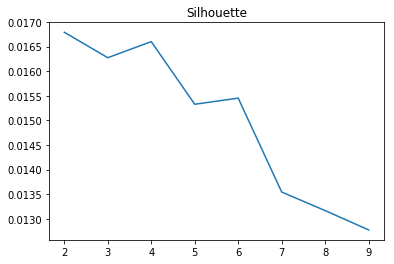

Best silhouette is 0.01679 - 1 clusters
Comments from each cluster:
Cluster 0:watch?v=vtaRGgvGtWQ   Check this out .ï»¿
Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com
i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿
and u should.d check my channel and tell me what I should do next!ï»¿
https://twitter.com/GBphotographyGBï»¿
please like :D https://premium.easypromosapp.com/voteme/19924/616375350ï»¿
I'm only checking the viewsï»¿
http://www.ebay.com/itm/171183229277?ssPageName=STRK:MESELX:IT&amp	_trksid=p3984.m1555.l2649 ï»¿
http://ubuntuone.com/40beUutVu2ZKxK4uTgPZ8Kï»¿
Show your AUBURN PRIDE HERE: http://www.teespring.com/tigermeathoodieï»¿
just checking the viewsï»¿
marketglory . com/strategygame/andrijamatf earn real money from game
Hey guys! Im a 12 yr old music producer. I make chiptunes and 8bit music.  It would be wonderful if you checked out some of my 8bit remixes! I even  have a gangnamstyle 8bit remix if you w

WHY DOES THIS HAVE 2 BILLION VIEWS THIS SONG IS SO ANNOYINGï»¿
https://www.facebook.com/pages/Mathster-WP/1495323920744243?ref=hlï»¿
1 millioon dislikesssssssssssssssssssssssssssssssss.............ï»¿
We get it, you came here for the views... ï»¿
Wow this video is the most viewed youtube video.. second that comes Justin  bieber- baby SMH WHAT HAS THE WORLD COME TOï»¿
This song is great there are 2,127,315,950 views wowï»¿
I'm watching this in 2014ï»¿
Most viewed video on youtube...daaaaaaaaaaannng those views can almost  dominate the entire...china...ï»¿
What my gangnam styleï»¿
Enough with the whole "how does this have two billion views if there's only  7 million on the planet" we get it. You're joking. It's not funny anymore.ï»¿
YOUTUBE MONEY !!!!!!!!!!!!!!!!!!!!!!!ï»¿
2 billion for this shit?ï»¿
If I get 300 subscribers by tomorrow I'll do a epic Hunger Games Video! ï»¿
follower please https://www.facebook.com/lists/161620527267482ï»¿
2 billion views wow not even baby by justin beib

I love this song sooooooooooooooo muchï»¿
Hey if you guys wouldnt mind...could you check out my boys and my music...we just made a real lyrical song...search DNA Andrew Guasch...I appreciate it. Leave some real feedback and keep Hip-Hop alive
Is that girl is Megan fox ï»¿
So freaking sad...ï»¿
hey guys if you guys can please SUBSCRIBE to my channel ,i&#39	m a young rapper really dedicated i post a video everyday ,i post a verse (16 bars)(part of a song)everyday to improve i&#39	m doing this for 365 days ,right now i&#39	m on day 41  i&#39	m doing it for a whole year without missing one day if you guys can please SUBSCRIBE and follow me on my journey to my dream watch me improve, it really means a lot to me  thank you (:, i won&#39	t let you down i promise(: i&#39	m lyrical i keep it real!
i like the lyrics but not to music videoï»¿
I hope everyone is in good spirits I&#39	m a hard working student who&#39	s also a passionate singer I look foward to the day when I can make my own music t

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt

print("Executing - Complete Linkage")
silhouetteValues = []
bestFitLabels = []

n_clusters = 10

for k in range(2, n_clusters):
    t0 = time()
    complete = AgglomerativeClustering(n_clusters=k, linkage='complete')
    complete.fit(vectorized.toarray())
    labels = complete.labels_
    silhouette = metrics.silhouette_score(vectorized.toarray(), labels, metric='euclidean')
    silhouetteValues.append(silhouette)
    
    #Store the labels for the best silhouette
    if silhouette >= max(silhouetteValues):
        bestFitLabels = labels
    print("Clusters: %d - %0.5f - done in %0.3fs" % (k, silhouette, (time() - t0)))

plt.title('Silhouette')
plt.plot(list(range(2 , n_clusters)), silhouetteValues)
plt.show()

print("Best silhouette is %0.5f - %d clusters" % (max(silhouetteValues), max(bestFitLabels)))
      
print("Comments from each cluster:")
for i in range(min(bestFitLabels), max(bestFitLabels) + 1):
    print("Cluster %d:" % i, end='')
    for index, original in enumerate(corpusOriginal):
        if bestFitLabels[index] == i:
            print(original)
    print()

In [ ]:
# Metrics to be applied

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))